<a href="https://colab.research.google.com/github/lponcec94/PolyWorks/blob/main/semana_3/Ejemplo_London_Bicycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objetivo 

1. Realizar estandarización a los datos de dos maneras:
  
  * z-score
  * mínimo y máximo

2. Implementar PCA. 
3. Utilizar el método del codo para seleccionar el número óptimo de clusters.
4. Utilizar el modelo de KMeans

### Introducción 

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lponcec94/PolyWorks/main/semana_3/data/london-bicycles.csv')

#### EDA

In [3]:
df.head()

,station_name,duration,num_trips,distance_from_city_center
0,"Borough Road, Elephant & Castle",1349.318091,7523,0.126240
1,"Webber Street , Southwark",823.879056,8136,0.164021
2,"Great Suffolk Street, The Borough",844.355487,10442,0.193667
3,"LSBU (Borough Road), Elephant & Castle",1297.835314,7068,0.257903
4,"Harper Road, Borough",822.686747,1660,0.306306


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   station_name               794 non-null    object 
 1   duration                   794 non-null    float64
 2   num_trips                  794 non-null    int64  
 3   distance_from_city_center  794 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 24.9+ KB


In [5]:
df['station_name'].unique().shape

(794,)

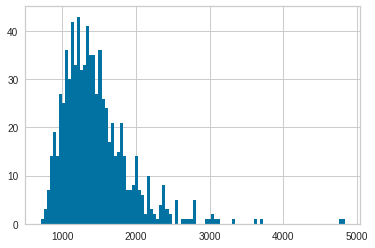

In [6]:
df['duration'].hist(bins=100)

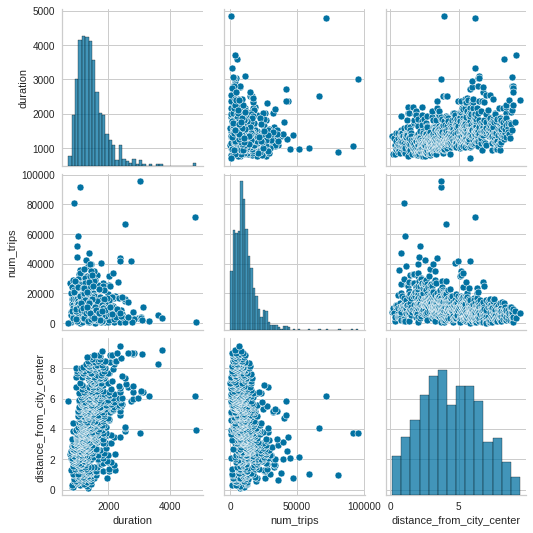

In [7]:
sns.pairplot(df)

#### 1. Estandarizando los datos

> $z = (x - u) / s$

In [8]:
scaler = StandardScaler()
df_standar_scaler = scaler.fit_transform(df._get_numeric_data())

In [9]:
pd.DataFrame(df_standar_scaler)

,0,1,2
0,-0.220841,-0.441092,-2.005421
1,-1.351131,-0.378736,-1.987841
2,-1.307084,-0.144163,-1.974046
3,-0.331587,-0.487376,-1.944155
4,-1.353696,-1.037493,-1.921633
...,...,...,...
789,1.757732,-0.258500,2.115129
790,2.573195,-0.766300,2.117547
791,0.699633,-0.356255,2.172874
792,4.869996,-0.861106,2.205548


> X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

> X_scaled = X_std * (max - min) + min

In [10]:
scaler = MinMaxScaler()
df_minmax_scaler = scaler.fit_transform(df._get_numeric_data())

In [11]:
pd.DataFrame(df_minmax_scaler).describe()

,0,1,2
count,794.000000,794.000000,794.000000
mean,0.180632,0.123768,0.460277
std,0.112617,0.102757,0.229661
min,0.000000,0.000000,0.000000
25%,0.104217,0.062241,0.284741
50%,0.159115,0.104263,0.441320
75%,0.226270,0.153848,0.627413
max,1.000000,1.000000,1.000000


#### 2. Implementando PCA

In [15]:
pca = PCA()
pca.fit(df_standar_scaler)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.explained_variance_ratio_

array([0.51845176, 0.31356488, 0.16798337])

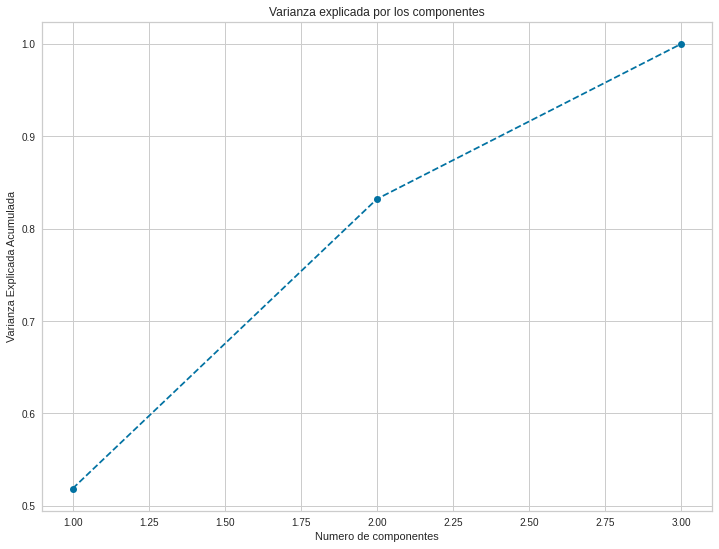

In [20]:
plt.figure(figsize=(12, 9))

plt.plot(range(1, 4), pca.explained_variance_ratio_ .cumsum(), marker='o', linestyle='--')
plt.title("Varianza explicada por los componentes")
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza Explicada Acumulada");

In [ ]:
pca = PCA(n_components=2)
pca.fit(df_standar_scaler)

In [16]:
standard_pca = pca.transform(df_standar_scaler)
standard_pca.shape

(794, 3)

In [116]:
df_standard_pca = pd.DataFrame(standard_pca, 
                               columns=['C1', 'C2'])
df_standard_pca.head()

,C1,C2
0,1.299881,-0.546676
1,1.955028,-1.181406
2,2.027983,-0.967819
3,1.299222,-0.648669
4,1.609642,-1.704574


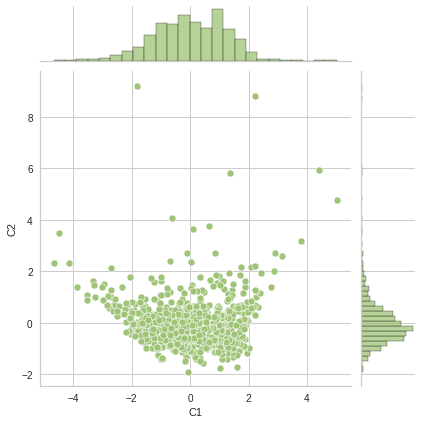

In [117]:
sns.jointplot(data=df_standard_pca, x='C1', y='C2', color='g')



---



---



In [118]:
pca = PCA(n_components=2)
pca.fit(df_minmax_scaler)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [119]:
minmax_pca = pca.transform(df_minmax_scaler)
minmax_pca.shape

(794, 2)

In [120]:
df_minmax_pca = pd.DataFrame(minmax_pca, 
                               columns=['C1', 'C2'])
df_minmax_pca.head()

,C1,C2
0,-0.439657,-0.002132
1,-0.466971,-0.100007
2,-0.466624,-0.081987
3,-0.428376,-0.016261
4,-0.441633,-0.142097


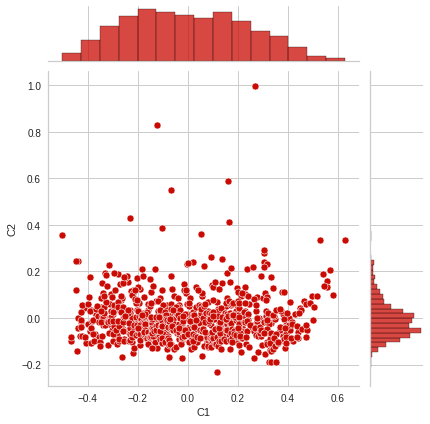

In [121]:
sns.jointplot(data=df_minmax_pca, x='C1', y='C2', color='r')

#### 3. Método del Codo

In [122]:
K = range(2, 10)

distortions = []
silhouette_coef = []

for k in K:
  model = KMeans(n_clusters=k).fit(df_standard_pca)
  distortions.append(model.inertia_)
  score = silhouette_score(df_standard_pca, model.labels_)
  silhouette_coef.append(score)


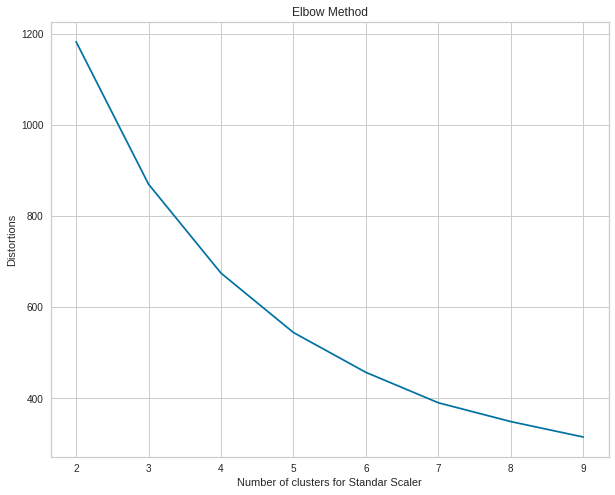

In [123]:
plt.figure(figsize=(10, 8))
plt.plot(K, distortions, 'x-')
plt.xlabel('Number of clusters for Standar Scaler')
plt.ylabel('Distortions')
plt.title('Elbow Method')
plt.show()

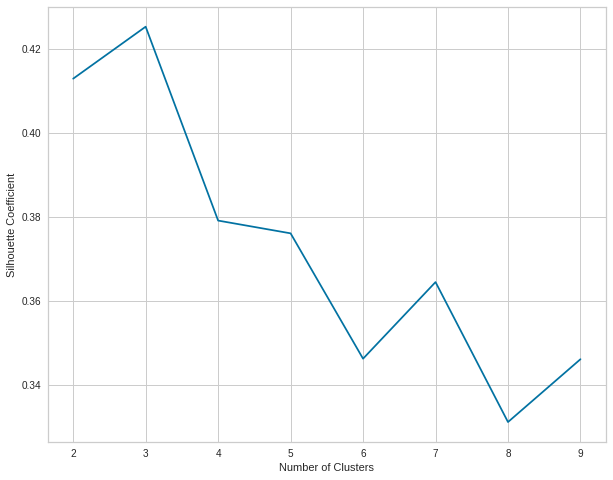

In [124]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 10), silhouette_coef)
plt.xticks(range(2, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f75f8f6ba10>,
                 k=None, metric=None, model=None, timings=True)

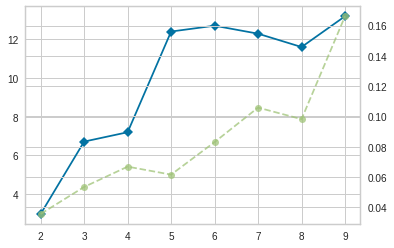

In [125]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(df_standard_pca)
# visualizer.show()

--- 

In [126]:
K = range(2, 10)

distortions = []
silhouette_coef = []

for k in K:
  model = KMeans(n_clusters=k).fit(df_minmax_pca)
  distortions.append(model.inertia_)
  score = silhouette_score(df_minmax_pca, model.labels_)
  silhouette_coef.append(score)


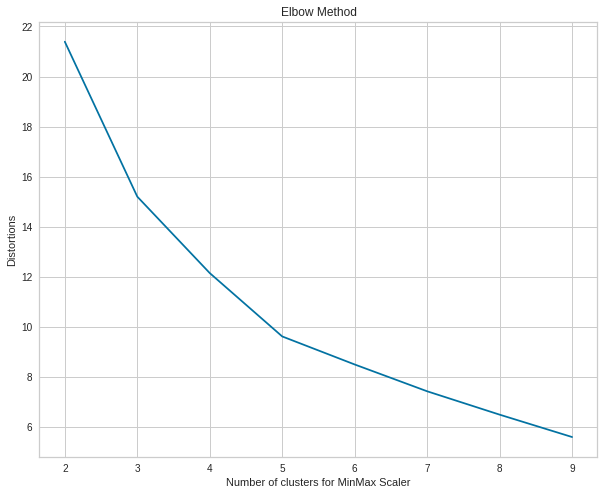

In [127]:
plt.figure(figsize=(10, 8))
plt.plot(K, distortions, 'x-')
plt.xlabel('Number of clusters for MinMax Scaler')
plt.ylabel('Distortions')
plt.title('Elbow Method')
plt.show()

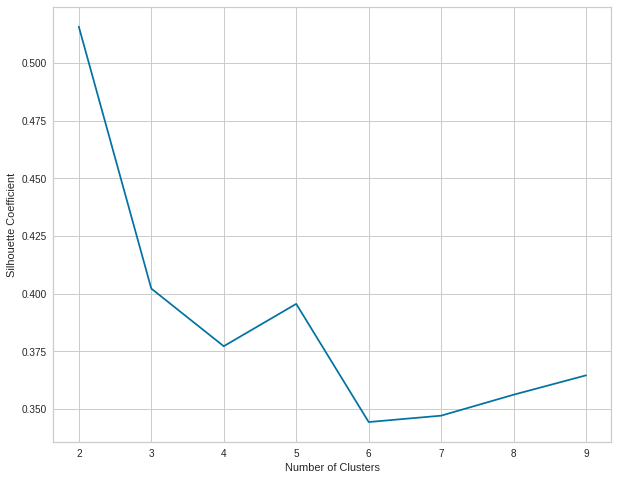

In [128]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 10), silhouette_coef)
plt.xticks(range(2, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f75f93ad290>,
                 k=None, metric=None, model=None, timings=True)

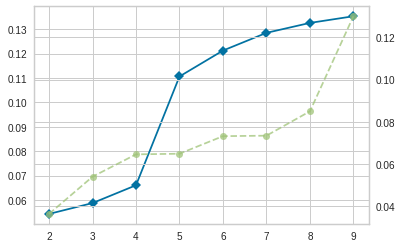

In [129]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(df_minmax_pca)
# visualizer.show()

#### 4. KMeans 

In [130]:
model = KMeans(n_clusters=3
              #  , random_state=42
               )
model.fit(df_standard_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [131]:
model.cluster_centers_

array([[-1.12815355,  0.02148384],
       [ 0.80103001, -0.29164822],
       [ 1.51647739,  2.50891982]])

In [132]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [133]:
predict_labels = model.predict(df_standard_pca)

In [134]:
df.head()

,station_name,duration,num_trips,distance_from_city_center
0,"Borough Road, Elephant & Castle",1349.318091,7523,0.126240
1,"Webber Street , Southwark",823.879056,8136,0.164021
2,"Great Suffolk Street, The Borough",844.355487,10442,0.193667
3,"LSBU (Borough Road), Elephant & Castle",1297.835314,7068,0.257903
4,"Harper Road, Borough",822.686747,1660,0.306306


In [135]:
df['cluster_standard'] = predict_labels

In [136]:
df.head(10)

,station_name,duration,num_trips,distance_from_city_center,cluster_standard
0,"Borough Road, Elephant & Castle",1349.318091,7523,0.126240,1
1,"Webber Street , Southwark",823.879056,8136,0.164021,1
2,"Great Suffolk Street, The Borough",844.355487,10442,0.193667,1
3,"LSBU (Borough Road), Elephant & Castle",1297.835314,7068,0.257903,1
4,"Harper Road, Borough",822.686747,1660,0.306306,1
5,"Harper Road, The Borough",1083.973129,4168,0.306306,1
6,"Borough High Street, The Borough",1222.199838,11119,0.386823,1
7,"Ontario Street, Elephant & Castle",1446.940998,12491,0.398630,1
8,"Union Street, The Borough",994.570945,12411,0.423106,1
9,"Swan Street, The Borough",1024.264873,12338,0.502051,1


--- 

In [137]:
model = KMeans(n_clusters=3
              #  , random_state=42
               )
model.fit(df_minmax_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [138]:
model.cluster_centers_

array([[-0.26440646,  0.01090993],
       [ 0.28848926,  0.00771012],
       [ 0.00111112, -0.01604478]])

In [139]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [140]:
predict_labels = model.predict(df_minmax_pca)

In [141]:
df['cluster_minmax'] = predict_labels

In [142]:
df.head(10)

,station_name,duration,num_trips,distance_from_city_center,cluster_standard,cluster_minmax
0,"Borough Road, Elephant & Castle",1349.318091,7523,0.126240,1,0
1,"Webber Street , Southwark",823.879056,8136,0.164021,1,0
2,"Great Suffolk Street, The Borough",844.355487,10442,0.193667,1,0
3,"LSBU (Borough Road), Elephant & Castle",1297.835314,7068,0.257903,1,0
4,"Harper Road, Borough",822.686747,1660,0.306306,1,0
5,"Harper Road, The Borough",1083.973129,4168,0.306306,1,0
6,"Borough High Street, The Borough",1222.199838,11119,0.386823,1,0
7,"Ontario Street, Elephant & Castle",1446.940998,12491,0.398630,1,0
8,"Union Street, The Borough",994.570945,12411,0.423106,1,0
9,"Swan Street, The Borough",1024.264873,12338,0.502051,1,0


--- 

In [143]:
import plotly.express as px

fig = px.scatter_3d(df, x='duration', y='num_trips', z='distance_from_city_center',
              color='cluster_standard', opacity=0.5)

fig.show()

In [144]:
import plotly.express as px
fig = px.scatter_3d(df, x='duration', y='num_trips', z='distance_from_city_center',
              color='cluster_standard', symbol='cluster_minmax' , opacity=0.5)
fig.show()

In [145]:
df.head()

,station_name,duration,num_trips,distance_from_city_center,cluster_standard,cluster_minmax
0,"Borough Road, Elephant & Castle",1349.318091,7523,0.126240,1,0
1,"Webber Street , Southwark",823.879056,8136,0.164021,1,0
2,"Great Suffolk Street, The Borough",844.355487,10442,0.193667,1,0
3,"LSBU (Borough Road), Elephant & Castle",1297.835314,7068,0.257903,1,0
4,"Harper Road, Borough",822.686747,1660,0.306306,1,0


In [146]:
df.tail()

,station_name,duration,num_trips,distance_from_city_center,cluster_standard,cluster_minmax
789,"Bridge Avenue, Hammersmith",2269.098519,9318,8.981545,0,1
790,"Montserrat Road , Putney",2648.183079,4326,8.986740,0,1
791,"Disraeli Road, Putney",1777.219098,8357,9.105643,0,1
792,"Putney Rail Station, Putney",3715.898645,3394,9.175861,0,1
793,"Ravenscourt Park Station, Hammersmith",2389.594064,6873,9.489655,0,1


In [147]:
df.iloc[:, 0:5].groupby('cluster_standard').agg(['mean', 'median', 'max', 'min'])

duration               ... distance_from_city_center          
                         mean       median  ...                       max       min
cluster_standard                            ...                                    
0                 1723.875727  1623.066157  ...                  9.489655  1.298668
1                 1194.894190  1183.179855  ...                  6.754258  0.126240
2                 1674.413747  1446.590258  ...                  6.178884  0.647035

[3 rows x 12 columns]

In [148]:
df.groupby('cluster_minmax').agg(['mean', 'median', 'max', 'min'])[['duration', 'num_trips', 'distance_from_city_center']]

duration               ... distance_from_city_center          
                       mean       median  ...                       max       min
cluster_minmax                            ...                                    
0               1219.951132  1151.344574  ...                  3.720811  0.126240
1               1767.660603  1612.868988  ...                  9.489655  3.947506
2               1401.960336  1345.596621  ...                  5.991593  3.055280

[3 rows x 12 columns]